In [1]:
%cd "C:\Users\khaih\Downloads\Project_2\Data"

C:\Users\khaih\Downloads\Project_2\Data


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import jieba
import re

In [25]:
import pandas as pd
#data = pd.read_csv("pre_data.csv", ,index_col=0)
products= pd.read_csv("pre_products_1.csv",delimiter=',',index_col=0)

### Đọc Dữ liệu

In [26]:
products.head()

,index,item_id,rating,product_content,product_content_wt
0,0,48102821,4.0,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,vân chống nước nhạc từ sạc đầy chỉ khoảng chờ ...
1,1,52333193,4.5,Tai nghe bluetooth không dây F9 True wireless ...,không dây wireless có báo kép nhạc giờ giờ . o...
2,2,299461,4.8,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,chuột không dây hàng chính hãng thương hiệu cá...
3,3,57440329,4.7,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,robot hàng chính hãng acome sku chính hãng aco...
4,4,38458616,4.8,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,hàng chính hãng mỹ hộp sạc sạc sku và nhỏ gọn ...


In [27]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4404 entries, 0 to 4403
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4404 non-null   int64  
 1   item_id             4404 non-null   int64  
 2   rating              4404 non-null   float64
 3   product_content     4401 non-null   object 
 4   product_content_wt  4404 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 206.4+ KB


In [28]:
products.tail()

,index,item_id,rating,product_content,product_content_wt
4399,4399,14497425,3.0,Máy Lạnh LG Inverter 1 HP V10APH THÔNG TIN CHI...,inverter làm lạnh làm lạnh dưới inverter có đi...
4400,4400,52294251,0.0,Micro Không Dây Alpha Works A1 Chính Hãng THÔN...,micro không dây chính hãng oem sku khử nhiễu c...
4401,4401,29246309,4.4,Máy sấy Electrolux 8 Kg EDV805JQSA THÔNG TIN C...,máy sấy electrolux bảng hiệu electrolux vải co...
4402,4402,48574854,5.0,"Bộ Chia 2 Pacific Dùng Chia Truyền Hình Cáp, A...",bộ pacific dùng cáp anten hàng pacific sku dùn...
4403,4403,60228865,4.0,Micro Đôi Karaoke - Micro Không Dây MV 01 - Hà...,micro micro không dây hàng chính hãng shubole ...


In [29]:
STOP_WORD_FILE='vietnamese-stopwords.txt'

In [30]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

### Thực hiện Cosine

In [31]:
from numpy import dot
from numpy.linalg import norm
X = [1,2]
Y = [2,2]
cos_sim = dot(X,Y) / (norm(X)*norm(Y))
print(cos_sim)

0.9486832980505138


In [32]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words=stop_words)

In [33]:
tfidf_matrix = tf.fit_transform(products.product_content_wt)

In [34]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [35]:
df_show = pd.DataFrame(cosine_similarities)
df_show.head(9)

,0,1,2,3,4,5,6,7,8,9,...,4394,4395,4396,4397,4398,4399,4400,4401,4402,4403
0,1.000000,0.448875,0.026251,0.166260,0.164855,0.088591,0.137979,0.299776,0.145991,0.010643,...,0.160960,0.005314,0.006959,0.004279,0.116898,0.021375,0.090304,0.003210,0.006867,0.083284
1,0.448875,1.000000,0.039306,0.192042,0.270065,0.145089,0.080187,0.394663,0.073360,0.062825,...,0.150867,0.008718,0.047739,0.001934,0.107926,0.017797,0.075077,0.005853,0.063803,0.142267
2,0.026251,0.039306,1.000000,0.013619,0.133447,0.047075,0.087245,0.005051,0.094663,0.461202,...,0.167311,0.045309,0.013929,0.017061,0.017742,0.054941,0.126014,0.024361,0.009706,0.104809
3,0.166260,0.192042,0.013619,1.000000,0.116951,0.040909,0.040817,0.143183,0.067315,0.010320,...,0.095022,0.004813,0.003703,0.002087,0.059276,0.006333,0.071612,0.002950,0.004866,0.035397
4,0.164855,0.270065,0.133447,0.116951,1.000000,0.297239,0.224755,0.156942,0.200321,0.115630,...,0.212215,0.038919,0.003113,0.022538,0.165621,0.134631,0.398654,0.021603,0.027135,0.268828
5,0.088591,0.145089,0.047075,0.040909,0.297239,1.000000,0.168080,0.101717,0.089822,0.049445,...,0.082706,0.017091,0.001166,0.009785,0.033354,0.031475,0.074464,0.012157,0.014446,0.089408
6,0.137979,0.080187,0.087245,0.040817,0.224755,0.168080,1.000000,0.027270,0.266760,0.079427,...,0.191890,0.019882,0.091864,0.019587,0.088351,0.044604,0.222948,0.031645,0.111013,0.244347
7,0.299776,0.394663,0.005051,0.143183,0.156942,0.101717,0.027270,1.000000,0.030770,0.006215,...,0.117076,0.001439,0.010209,0.001449,0.012276,0.050730,0.106606,0.001487,0.033941,0.157749
8,0.145991,0.073360,0.094663,0.067315,0.200321,0.089822,0.266760,0.030770,1.000000,0.053561,...,0.175775,0.018824,0.087615,0.016786,0.119113,0.067077,0.239325,0.020546,0.018133,0.192578


In [40]:
# với mỗi sản phẩm, lấy 3 sản phẩm tương quan nhất
# function lay x sap pham tuong quan nhat
# def find_highest_score(cosine_similarities, nums = 3):
results = {}

for idx, row in products.iterrows():
    #print(idx)
    similar_indices = cosine_similarities[idx].argsort()[-4:-1]
    similar_items = [(cosine_similarities[idx][i]) for i in similar_indices]
    similar_items = [(cosine_similarities[idx][i], products.index[i]) for i in similar_indices]
    print(similar_items[0:])
    results[idx] = similar_items[0:]

[(0.521343018584367, 719), (0.5405591590413998, 639), (0.5411399478911922, 228)]
[(0.9242865828961311, 119), (0.944501244326722, 23), (0.9734559384090246, 66)]
[(0.8169954660844188, 2019), (0.8234306807257178, 519), (0.9126449160577923, 57)]
[(0.3210926918452814, 46), (0.3863729591418822, 434), (0.5414361158810999, 113)]
[(0.36520024792146427, 4229), (0.374684913622651, 36), (0.39865406173697676, 4400)]
[(0.680977209163849, 887), (0.8985371627022151, 273), (0.9010049419508995, 388)]
[(0.34527968061045883, 13), (0.3506383742039858, 360), (0.43996762049054483, 260)]
[(0.690288884060919, 744), (0.7448745496166396, 994), (0.79104953304834, 59)]
[(0.4596215971760026, 393), (0.795094254282688, 271), (0.8055781551112988, 143)]
[(0.5314821181659765, 2020), (0.541138476533766, 893), (0.5564787194261809, 355)]
[(0.8783035886311352, 129), (0.8783035886311352, 2019), (0.9717376087971309, 519)]
[(0.4100250408047852, 2859), (0.5958895117468045, 2075), (0.5958895117468045, 333)]
[(0.8827683530000475,

[(0.5274014385825553, 90), (0.5465511684201758, 947), (0.5766058535671531, 664)]
[(0.36988838410476677, 3799), (0.4259747927332641, 4226), (0.4798734757984491, 984)]
[(0.35723464138965416, 3522), (0.4221835978003486, 151), (0.5920519487834857, 404)]
[(0.760011014139064, 119), (0.7638941118704002, 199), (0.7769273199776701, 635)]
[(0.39765221086226293, 146), (0.4057590720523154, 332), (0.4601062773055089, 2859)]
[(0.80169205206307, 1946), (0.8104041737089244, 46), (0.8291274648369745, 314)]
[(0.23764255544161045, 4172), (0.2459194241365437, 4280), (0.25318084604902275, 3684)]
[(0.6282006631195254, 272), (0.6678751904330826, 181), (0.6910736186889006, 910)]
[(0.3573147180256816, 1907), (0.3610394133252577, 1946), (0.4086434118383522, 46)]
[(0.5545566201142524, 501), (0.5586190966125563, 547), (0.5814508886295627, 2549)]
[(0.23675710138374378, 2103), (0.23675710138374378, 467), (0.277855221106382, 4285)]
[(0.47920035779040665, 2706), (0.607563293076725, 2677), (0.7996645242741734, 991)]
[

[(0.9716711348305894, 1304), (0.9810267865052733, 1044), (0.9959406330226589, 1603)]
[(0.38821075956514295, 2577), (0.3886553830906342, 2574), (0.3905405545568553, 2819)]
[(0.8200825914165384, 1026), (0.8200825914165384, 1643), (0.9107117025894262, 1059)]
[(0.37257971075747187, 1786), (0.4902246578892973, 1656), (0.5089948828338745, 1447)]
[(0.6576950256462415, 1986), (0.9856169649563671, 1868), (0.9908569687389379, 1222)]
[(0.3515877220601626, 1480), (0.35304134263602016, 1536), (0.36249817617784413, 1492)]
[(0.8281717301686664, 1914), (0.8286131294225665, 1546), (0.8320957794499969, 1769)]
[(0.30174313530605684, 1514), (0.3533903478295175, 1734), (0.35972653685634337, 1336)]
[(0.331305309924977, 1936), (0.3587935155223632, 1999), (0.36036537707174526, 606)]
[(0.6083529440160369, 1961), (0.6164798785752165, 1045), (0.8419065583352213, 1945)]
[(0.44421488878648474, 1916), (0.5863513246410854, 1591), (0.6996876536603835, 1139)]
[(0.6723094296229066, 1751), (0.9567193835048143, 1368), (0

[(0.653144828065508, 421), (0.7257612160245719, 1134), (0.7701358233191437, 899)]
[(0.6710847178060043, 1023), (0.6711601990486006, 1453), (0.9491436924195946, 1482)]
[(0.3004389326154367, 1209), (0.3380918331993155, 1232), (0.6198616167038239, 1834)]
[(0.6874467480172867, 1235), (0.7204889434222654, 1364), (0.8502454797222381, 1864)]
[(0.6033724518942454, 1085), (0.6177093500988721, 1864), (0.6812603484228719, 1831)]
[(0.38185261465800685, 1415), (0.4256866616292662, 1147), (0.4454461766043752, 1606)]
[(0.2736205045482849, 1631), (0.31913957935793147, 3721), (0.3416034372793622, 1423)]
[(0.6694951967075417, 1070), (0.672195398528225, 1965), (0.672195398528225, 1813)]
[(0.47051051522569537, 1897), (0.5067770928103335, 1855), (0.5187549676355875, 1269)]
[(0.6015750081372289, 1502), (0.7260562990129565, 1655), (0.9158772422109451, 1894)]
[(0.6419260476243687, 1127), (0.6551695318446822, 1645), (0.8419065583352213, 1262)]
[(0.9325056319547115, 1765), (0.9325056319547115, 1359), (0.9968884

[(0.481146465117792, 2492), (0.5500204753004042, 2652), (0.5784296530154243, 2853)]
[(0.48853284045861406, 2268), (0.4936442700527061, 2485), (0.5012014878569281, 2181)]
[(0.9127344722300877, 2952), (0.9169945837661789, 2595), (0.9277923590244295, 2388)]
[(0.6282170075331951, 2546), (0.6282170075331951, 2444), (0.8905698109045788, 2523)]
[(0.6226490595775005, 2024), (0.6426946779810851, 2701), (0.6560136086261648, 2285)]
[(0.9033164491875283, 2952), (0.9231258352351254, 2819), (0.9290436105990338, 2550)]
[(0.9671245869123748, 2430), (1.0, 2018), (1.0, 2191)]
[(0.2703517642365725, 2417), (0.31652483227623934, 2331), (0.4223621014320105, 2947)]
[(0.7313011861069709, 2295), (0.758668279734599, 2756), (1.0000000000000002, 2580)]
[(0.4619293014161633, 2485), (0.6446883273971474, 2166), (0.9615133595944958, 2776)]
[(0.5308932810691617, 2015), (0.541413878240422, 2159), (0.57255423635409, 2269)]
[(0.6613400636800655, 2284), (0.6775229619524575, 2479), (0.8816867784280946, 2627)]
[(0.414668400

[(0.5889978549594534, 3027), (0.7678623711692346, 3173), (0.9271894488261895, 3253)]
[(0.7176290948347274, 3255), (0.7558691408017683, 3266), (0.9770130899084201, 3143)]
[(0.55002624874252, 3054), (0.5727100186424476, 3003), (0.8269936666069629, 3403)]
[(0.26818795847624816, 1669), (0.3606067890422592, 1403), (0.4170250201928081, 1348)]
[(0.6721346976915169, 3254), (0.6862207277592861, 3211), (0.7179090205719033, 3205)]
[(0.842713037887232, 3197), (0.8524264855532963, 3315), (0.9930249822391595, 3059)]
[(0.5658882558572962, 3064), (0.5663556149982351, 3091), (0.9504177102361635, 3140)]
[(0.5285954466298374, 3316), (0.5392941212154009, 3148), (0.5532838619350013, 3226)]
[(0.47414340215199036, 3042), (0.47414340215199036, 3126), (0.47414340215199036, 3015)]
[(0.5464230461858033, 3188), (0.610115693180987, 3244), (0.625826595526913, 3248)]
[(0.6211206365467049, 3248), (0.6520906446942217, 3298), (0.6733982433489232, 3275)]
[(0.3967172622503021, 3139), (0.39806823095833793, 3141), (0.53460

[(0.7864207639221336, 4075), (0.817230800515974, 3848), (0.817230800515974, 3930)]
[(0.7301615755931481, 3848), (0.7301615755931481, 3930), (0.7349675802248549, 3836)]
[(0.5941576221230103, 633), (0.8021206112797736, 3831), (0.9446928853003735, 3970)]
[(0.4574471558883632, 3595), (0.6144960551857203, 4305), (0.7452545796849653, 3911)]
[(0.29662469906756506, 3489), (0.31645561062148886, 847), (0.3821040259537328, 2104)]
[(0.4282381551074685, 3588), (0.4997403983389264, 4379), (0.502766223983012, 4103)]
[(0.5488809757100941, 4194), (0.5693986664597745, 4403), (0.5716084281181478, 4379)]
[(0.5164550442331277, 3546), (0.523226399301918, 3660), (0.8978648892326814, 3446)]
[(0.9089007020828633, 3610), (0.9133041130077163, 3651), (0.9544041213827973, 4314)]
[(0.4190432054947538, 3305), (0.4946529565324349, 3174), (0.5029513793776862, 3256)]
[(0.42498395174623493, 3159), (0.43006838093181254, 171), (0.49880569866560875, 766)]
[(0.544124303874187, 3801), (0.6408148460813754, 4215), (0.675722895

[(0.5577734769602454, 3924), (0.6475313004253752, 4117), (0.7845244296565393, 4333)]
[(0.8075894967962797, 3791), (0.8334711388603822, 4092), (0.8398594632067702, 3653)]
[(0.5710062559504182, 3464), (0.6790899729452808, 4229), (0.679597267872566, 3872)]
[(0.9617087431621314, 3414), (0.9687514117752393, 3456), (0.9706556257385431, 3426)]
[(0.31723673225174936, 957), (0.3799614812489992, 2163), (0.3911174198935226, 2708)]
[(0.6402831876371579, 3620), (0.6405238850991594, 3872), (0.806883596931773, 4194)]


In [91]:
result = {}
for idx, row in products.iterrows():    
    similar_indices = cosine_similarities[idx].argsort()[-11:-1]
    similar_items = [(cosine_similarities[idx][i], products['item_id'][i]) for i in similar_indices]
    result[row['item_id']] = similar_items[0:]

In [92]:
result[46824399]

[(0.6039567232907858, 24766023),
 (0.6434937118693903, 7820533),
 (0.6452496026644143, 45123323),
 (0.6527034508973176, 15079790),
 (0.6527034508973176, 23852057),
 (0.6664538476251779, 46841782),
 (0.6743352948862107, 10678416),
 (0.6779004791506663, 19992253),
 (0.6882500993850457, 48493605),
 (0.7448745496166396, 47321729)]

In [93]:
#Lấy thông tin sản phẩm
def item(id):
    return products.loc[products['item_id']==id]['product_content'].to_list()[0].split('-')[0]

#thông tin sp gợi ý
def recommend_item(item_id, num):
    print('Get similar item for' +' '+ item(item_id))
    print('People who liked this product also liked these')
    print('* '*60)
    recs = result[item_id][:num]
    print(recs)
    for rec in recs:
        print(rec[1])
        print('product_id ' + str(rec[1]) + ',' + item(rec[1]) + '(score' +str(rec[0]) + ')')

In [37]:
from wordcloud import WordCloud

In [38]:
def get_product_text(item_id, num):
    rec_basket = [r[1] for r in result[item_id]] + [item_id]
    text = (products[products.item_id.isin(rec_basket)])
    return ''.join(text.product_content_wt)

In [39]:
wordcloud_text = get_product_text(38458616,5)

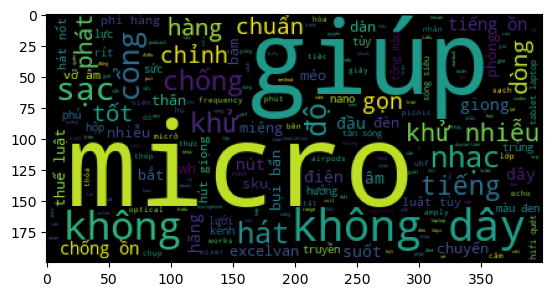

In [53]:
wordcloud_ = WordCloud(stopwords = stop_words).generate(wordcloud_text)
plt.imshow(wordcloud_)

In [103]:
info = []
for p_id, v in result.items():
    for item in v:
        info.append({
        'product_id': p_id,
        'recommend_pd':item[1],
        'score': item[0],
        'name_product':products.loc[products["item_id"]==item[1]]["product_content"].to_list()[0].split('-')[0]})
content_base_df = pd.DataFrame(info)

### In kết quả với Product Id = 299461

In [106]:
content_base_df[content_base_df["product_id"]==299461]

,product_id,recommend_pd,score,name_product
20,299461,44241909,0.685888,Chuột USB HP Wireless Mouse 250 A/P_3FV67AA
21,299461,56889347,0.706657,Chuột Không Dây HXSJ X50 Plus
22,299461,203734,0.734963,Chuột Không Dây Logitech M325
23,299461,56930154,0.740961,Chuột Không Dây Sạc Pin HXSJ M402
24,299461,515551,0.756135,Bộ Bàn Phím Và Chuột Không Dây Logitech MK345
25,299461,389145,0.806677,Chuột Không Dây Logitech B175
26,299461,54665,0.816995,Chuột Không Dây Logitech M185
27,299461,54665,0.816995,Chuột Không Dây Logitech M185
28,299461,74267277,0.823431,Chuột Không Dây NETBOX HT79
29,299461,299431,0.912645,Chuột Không Dây Logitech M221
